## Malaria visualizations 

Some plots from [this tidy Tuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-11-13) data set.

October 2nd, 2020

-----------

### 0. Setup and Get Data 

In [1]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns 
import plotly.graph_objects as go

In [14]:
# Looking at the dataset corresponding to Malaria deaths by age across
# the world and time. 
malaria_deaths_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv"
malaria_deaths_df = pd.read_csv(malaria_deaths_url)
malaria_deaths_df

,Unnamed: 0,entity,code,year,age_group,deaths
0,1,Afghanistan,AFG,1990,Under 5,184.606435
1,2,Afghanistan,AFG,1991,Under 5,191.658193
2,3,Afghanistan,AFG,1992,Under 5,197.140197
3,4,Afghanistan,AFG,1993,Under 5,207.357753
4,5,Afghanistan,AFG,1994,Under 5,226.209363
...,...,...,...,...,...,...
30775,30776,Zimbabwe,ZWE,2012,50-69,103.185111
30776,30777,Zimbabwe,ZWE,2013,50-69,100.113293
30777,30778,Zimbabwe,ZWE,2014,50-69,99.013890
30778,30779,Zimbabwe,ZWE,2015,50-69,98.091738


### 1. How much do malaria deaths change across age groups by year?

In [3]:
# First, what are the age groups? 
malaria_deaths_df["age_group"].unique()

array(['Under 5', '70 or older', '5-14', '15-49', '50-69'], dtype=object)

Text(0.5, 1.0, 'Malaria deaths across time, by age group')

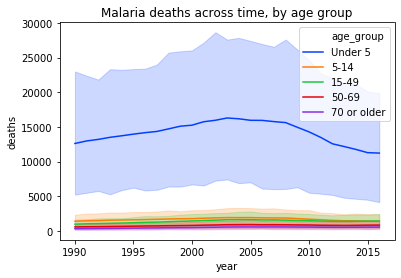

In [4]:
# orders for age group, so they make sense
age_orders = ["Under 5", "5-14", "15-49", "50-69", "70 or older"]
(
    sns.
    lineplot(x="year", y="deaths",
             hue="age_group", 
             hue_order = age_orders,
             palette="bright",
             data=malaria_deaths_df).
    set_title("Malaria deaths across time, by age group")
)

Wow, deaths in the "Under 5" age group seem disproportionately high. We can see in the plot above that there is some variation by year, but on the whole deaths in the under 5 group range between 12,000-15,000 or so. So, let's take the average in the under 5 age group and see if there are any patterns by country. 

### 2. How does average death rate in the under 5 age group vary by country? 

First, what are the countries represented? Any non-countries included in the country column? 

In [18]:
malaria_deaths_df["entity"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe',
       'Eastern Sub-Saharan Africa', 'Ecuador', 'E

Mostly seems fine, but let's exclude regions (eg. "World", "Sub-Saharan Africa", etc) since we just want to look at this by country. We also need to reorganize the data a little, because we only want the under 5 data, and we want it averaged by year. 

In [26]:
# Get under 5 data only 
malaria_under5_deaths = malaria_deaths_df.loc[malaria_deaths_df["age_group"] == "Under 5"]

# Remove regions from the "entity" (ie. country) column 
regions_to_exclude = ["Andean Latin America",
                      "Australasia",
                      "Central Asia", 
                      "Central Europe",
                      "Central Latin America", 
                      "Central Sub-Saharan Africa",
                      "East Asia", 
                      "Eastern Europe",
                      "Eastern Sub-Saharan Africa",
                      "High SDI", 
                      "High-income Asia Pacific", 
                      "High-middle SDI",
                      "Latin America and Caribbean",
                      "Low SDI", 
                      "Low-middle SDI",
                      "Middle SDI",
                      "North Africa and Middle East",
                      "North America",
                      "South Asia",
                      "Southeast Asia",
                      "Southern Latin America", 
                      "Southern Sub-Saharan Africa",
                      "Sub-Saharan Africa",
                      "Tropical Latin America",
                      "Western Europe",
                      "Western Sub-Saharan Africa",
                      "World"]
malaria_under5_deaths = malaria_under5_deaths.loc[~malaria_under5_deaths["entity"].isin(regions_to_exclude)]

# Get the average number of deaths by country
malaria_under5_avg_deaths = malaria_under5_deaths.groupby("entity").mean()

Let's reset the index (we need it as a column), round the number of deaths for readability, and add a `text` column (for what is shown upon hover) combining the Country and average death values: 

In [27]:
malaria_under5_avg_deaths.reset_index(inplace=True)
malaria_under5_avg_deaths = malaria_under5_avg_deaths.round(2)
malaria_under5_avg_deaths["text"] = malaria_under5_avg_deaths["entity"] + ": " + malaria_under5_avg_deaths["deaths"].astype(str)
malaria_under5_avg_deaths.head()

,entity,Unnamed: 0,year,deaths,text
0,Afghanistan,14,2003,315.89,Afghanistan: 315.89
1,Albania,41,2003,0.00,Albania: 0.0
2,Algeria,68,2003,0.50,Algeria: 0.5
3,American Samoa,95,2003,0.00,American Samoa: 0.0
4,Andorra,149,2003,0.00,Andorra: 0.0


In [28]:
malaria_under5_deaths.loc[malaria_under5_deaths["deaths"] == malaria_under5_deaths["deaths"].max()]

,Unnamed: 0,entity,code,year,age_group,deaths
3906,3907,Nigeria,NGA,2008,Under 5,261794.558211


In [29]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = malaria_under5_avg_deaths["entity"],
    z = malaria_under5_avg_deaths["deaths"],
    text = malaria_under5_avg_deaths["text"],
    autocolorscale=True,
    reversescale=False,
    colorbar_title = 'Average under 5 malaria deaths',
))

fig.update_layout(
    title_text='Average under 5 malaria deaths by country: 1990-2016',
    geo=dict(
        showcoastlines=True,
    ),
)

It's really hard to see many of the values, because the majority of countries have considerably lower malaria deaths than those of